In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import json

In [2]:
tn_quake = pd.read_csv("../data/earthquake_tn_01_clean.csv")
tn_quake.shape

(4766, 19)

if possible find closest city with a geopandas trick?

## create a map view with folium

In [3]:
center = (35, -86)

In [4]:
map_tn = folium.Map(location = center, zoom_start = 7)
#map_tn

In [5]:
#print(tn_quake.dtypes)

### needed extra map assignments because of output conflicts

#### didn't work

map_tn2 = map_tn  
map_tn3 = map_tn  
map_tn4 = map_tn  
map_tn5 = map_tn  
map_tn6 = map_tn  
map_tn7 = map_tn  
map_tn8 = map_tn

In [6]:
map_tn0 = folium.Map(location = center, zoom_start = 7)
map_tn1 = folium.Map(location = center, zoom_start = 7)
map_tn2 = folium.Map(location = center, zoom_start = 7)
map_tn3 = folium.Map(location = center, zoom_start = 7)
map_tn4 = folium.Map(location = center, zoom_start = 7)

#### works

for i in range(0,len(tn_quake)):  
   folium.Circle(  
      location = [tn_quake.iloc[i]['latitude'], tn_quake.iloc[i]['longitude']],  
      #popup = tn_quake.iloc[i]['place'],   
      #radius = tn_quake.iloc[i]['magnitude']*10000,  
      radius = 10000,  
      color = 'lightblue',  
      #color = tn_quake.iloc[i]['year'],  
      fill = True,  
      fill_color = 'lightblue'  
   ).add_to(map_tn2)

In [7]:
#map_tn2

In [8]:
#tn_quake.info()

In [9]:
tn_quake_notna = tn_quake[tn_quake['magnitude'].notna()]
tn_quake_notna = tn_quake_notna[tn_quake_notna['year'].notna()]
tn_quake_notna['year'] = tn_quake_notna['year'].astype(float)
tn_quake_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4764 entries, 0 to 4765
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4764 non-null   object 
 1   latitude         4764 non-null   float64
 2   longitude        4764 non-null   float64
 3   depth            4759 non-null   float64
 4   magnitude        4764 non-null   float64
 5   news_source      4764 non-null   object 
 6   latest_updated   4764 non-null   object 
 7   place            4764 non-null   object 
 8   seismic_type     4764 non-null   object 
 9   location_error   3569 non-null   float64
 10  depth_error      3568 non-null   float64
 11  magnitude_error  3514 non-null   float64
 12  review_status    4764 non-null   object 
 13  year             4764 non-null   float64
 14  month            4764 non-null   int64  
 15  day              4764 non-null   int64  
 16  time             4764 non-null   object 
 17  state         

#### works

for i in range(0,len(tn_quake_notna)):  
   folium.Circle(  
      location = [tn_quake_notna.iloc[i]['latitude'], tn_quake_notna.iloc[i]['longitude']],  
      #popup = tn_quake.iloc[i]['place'],  
      radius = tn_quake_notna.iloc[i]['magnitude']*1000,  
      #radius = 10000,  
      color = 'lightblue',  
      #color = tn_quake.iloc[i]['year'],  
      fill = True,  
      fill_color = 'lightblue'  
   ).add_to(map_tn4)  

In [10]:
#map_tn4

for i in range(0,len(tn_quake_notna)):  
   folium.Circle(  
      location = [tn_quake_notna.iloc[i]['latitude'], tn_quake_notna.iloc[i]['longitude']],  
      #popup = tn_quake.iloc[i]['place'],   
      radius = tn_quake_notna.iloc[i]['magnitude']*1000,  
      #radius = 10000,  
      #color = 'lightblue',  
      color = tn_quake.iloc[i]['magnitude'],   
      fill = True,  
      fill_color = tn_quake.iloc[i]['magnitude'],  
   ).add_to(map_tn6)

map_tn6

(no need) tn_quake_notna.reset_index()

(no need) tn_quake_notna.head()

In [11]:
import matplotlib
import matplotlib.pyplot as plt

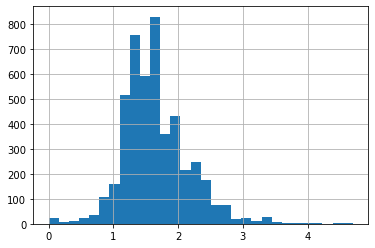

In [12]:
magnitudes = tn_quake_notna['magnitude'].hist(bins=30)

#### this was all above mag 3

tn_quake_mag3 = tn_quake_notna[tn_quake_notna['magnitude'] > 2.999]
tn_quake_mag3.head()

tn_quake_mag3.shape

## get rid of non-null rows for folium compatibility

In [13]:
tn_quake_notna = tn_quake[tn_quake['magnitude'].notna()]
tn_quake_notna = tn_quake_notna[tn_quake_notna['year'].notna()]
tn_quake_notna['year'] = tn_quake_notna['year'].astype(float)
tn_quake_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4764 entries, 0 to 4765
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4764 non-null   object 
 1   latitude         4764 non-null   float64
 2   longitude        4764 non-null   float64
 3   depth            4759 non-null   float64
 4   magnitude        4764 non-null   float64
 5   news_source      4764 non-null   object 
 6   latest_updated   4764 non-null   object 
 7   place            4764 non-null   object 
 8   seismic_type     4764 non-null   object 
 9   location_error   3569 non-null   float64
 10  depth_error      3568 non-null   float64
 11  magnitude_error  3514 non-null   float64
 12  review_status    4764 non-null   object 
 13  year             4764 non-null   float64
 14  month            4764 non-null   int64  
 15  day              4764 non-null   int64  
 16  time             4764 non-null   object 
 17  state         

for i in range(0,len(tn_quake_mag3)):  
   folium.Circle(  
      location = [tn_quake_mag3.iloc[i]['latitude'], tn_quake_mag3.iloc[i]['longitude']],  
      #popup = tn_quake.iloc[i]['place'],   
      radius = tn_quake_mag3.iloc[i]['magnitude']*1000,  
      #radius = 10000,  
      color = 'lightblue',  
      #color = tn_quake.iloc[i]['year'],  
      fill = True,  
      fill_color = 'lightblue'  
   ).add_to(map_tn7)

In [14]:
# map_tn7

In [15]:
# tn_quake_mag3.info()

map_tn9 = map_tn  
map_tn10 = map_tn  
map_tn11 = map_tn  
map_tn12 = map_tn  
map_tn13 = map_tn  
map_tn14 = map_tn  
map_tn15 = map_tn  
map_tn10 = map_tn  
map_tn11 = map_tn  
map_tn12 = map_tn  
map_tn13 = map_tn  
map_tn14 = map_tn

# Maps by incramental magnitude: radii indicate potential "felt" area

In [16]:
tn_quake_mag0 = tn_quake_notna[(tn_quake_notna['magnitude'] > 0) & (tn_quake_notna['magnitude'] < 1)]
tn_quake_mag0['magnitude'].value_counts()

0.90    63
0.80    27
0.70    27
0.60    14
0.40     9
0.50     8
0.99     6
0.92     5
0.95     4
0.20     4
0.97     4
0.86     3
0.96     3
0.98     3
0.87     3
0.30     3
0.64     2
0.73     2
0.10     2
0.79     2
0.74     2
0.85     2
0.67     1
0.69     1
0.88     1
0.68     1
0.54     1
0.94     1
0.78     1
0.39     1
0.51     1
0.89     1
Name: magnitude, dtype: int64

In [17]:
tn_quake_mag1 = tn_quake_notna[(tn_quake_notna['magnitude'] >= 1) & (tn_quake_notna['magnitude'] < 2)]
tn_quake_mag1.shape

(3449, 19)

In [18]:
tn_quake_mag2 = tn_quake_notna[(tn_quake_notna['magnitude'] >= 2) & (tn_quake_notna['magnitude'] < 3)]
tn_quake_mag2.shape

(992, 19)

In [19]:
tn_quake_mag3 = tn_quake_notna[(tn_quake_notna['magnitude'] >= 3) & (tn_quake_notna['magnitude'] < 4)]
tn_quake_mag3.shape

(79, 19)

In [20]:
tn_quake_mag4 = tn_quake_notna[(tn_quake_notna['magnitude'] >= 4) & (tn_quake_notna['magnitude'] < 5)]
tn_quake_mag4.shape

(13, 19)

In [21]:
tn_quake_mag5 = tn_quake_notna[(tn_quake_notna['magnitude'] >= 5) & (tn_quake_notna['magnitude'] < 6)]
tn_quake_mag5.shape

(0, 19)

In [22]:
for i in range(0,len(tn_quake_mag0)):
   folium.Circle(
      location = [tn_quake_mag0.iloc[i]['latitude'], tn_quake_mag0.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = (tn_quake_mag0.iloc[i]['magnitude']*.7)**9,
      #radius = 1,
      color = 'black',
      weight = 1, 
      #color = tn_quake.iloc[i]['year'], 
      fill = False,
      fill_color = 'black'
   ).add_to(map_tn0)
map_tn0

In [23]:
for i in range(0,len(tn_quake_mag1)):
   folium.Circle(
      location = [tn_quake_mag1.iloc[i]['latitude'], tn_quake_mag1.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = (tn_quake_mag1.iloc[i]['magnitude']*.79)**9,
      #radius = 1000,
      color = 'darkgreen',
      weight = 1,
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'darkgreen'
   ).add_to(map_tn1)
map_tn1

In [24]:
for i in range(0,len(tn_quake_mag2)):
   folium.Circle(
      location = [tn_quake_mag2.iloc[i]['latitude'], tn_quake_mag2.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = (tn_quake_mag2.iloc[i]['magnitude']*.85)**9,
      #radius = 4000,
      color = 'darkblue',
      weight = 2,
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'darkblue'
   ).add_to(map_tn2)
map_tn2

In [25]:
for i in range(0,len(tn_quake_mag3)):
   folium.Circle(
      location = [tn_quake_mag3.iloc[i]['latitude'], tn_quake_mag3.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = (tn_quake_mag3.iloc[i]['magnitude']*.75)**9,
      #radius = 8000,
      color = 'purple',
      weight = 1,
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'purple'
   ).add_to(map_tn3)
map_tn3

In [26]:
for i in range(0,len(tn_quake_mag4)):
   folium.Circle(
      location = [tn_quake_mag4.iloc[i]['latitude'], tn_quake_mag4.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = (tn_quake_mag4.iloc[i]['magnitude']*.7)**9,
      #radius = 40000,
      color = 'red',
      weight = 1,
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'red'
   ).add_to(map_tn4)
map_tn4